# Case Study Customer Analysis

## Load data

In [1]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
import statsmodels.api as sm
import math

In [2]:
# We import our data from Excel file
ca_df=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")
ca_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    # we drop effective_to_date column
    df=df.drop(columns=['effective_to_date'])
    return df



In [4]:

def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[ca_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[ca_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df


In [5]:
ca_df=clean_data(ca_df)
ca_df=transform(ca_df)


C:\Users\merce\AppData\Local\Temp/ipykernel_12324/3271366430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"]=round(df["total_claim_amount"],0)
C:\Users\merce\AppData\Local\Temp/ipykernel_12324/3271366430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
C:\Users\merce\AppData\Local\Temp/ipykernel_12324/3271366430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [6]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


## Working with Data type

In [7]:
# checking data type of our data set
ca_df.info()
# We this function we can see the data type.
# after checkin the data. The column "number of open complaint" should not be a float.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 10908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6817 non-null   object 
 1   customer_lifetime_value        6817 non-null   float64
 2   response                       6817 non-null   object 
 3   coverage                       6817 non-null   object 
 4   employmentstatus               6817 non-null   object 
 5   gender                         6817 non-null   object 
 6   income                         6817 non-null   int64  
 7   location_code                  6817 non-null   object 
 8   marital_status                 6817 non-null   object 
 9   monthly_premium_auto           6817 non-null   int64  
 10  months_since_last_claim        6817 non-null   float64
 11  months_since_policy_inception  6817 non-null   int64  
 12  number_of_open_complaints      6817 non-null   

In [8]:
# variable "number_of_open_complaints" should not be a float number. 
# We can see that there is many NaN values in the columns.
#We cannot transform "number_of_open_complaints" into an integer because of Nan values 
#In this case, we have to replace the NaN values with "0" with replace function.


ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].fillna(0)






In [9]:
# we can transform "number_of_open_complaints" into an integer

ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].astype('int')

In [10]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 10908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6817 non-null   object 
 1   customer_lifetime_value        6817 non-null   float64
 2   response                       6817 non-null   object 
 3   coverage                       6817 non-null   object 
 4   employmentstatus               6817 non-null   object 
 5   gender                         6817 non-null   object 
 6   income                         6817 non-null   int64  
 7   location_code                  6817 non-null   object 
 8   marital_status                 6817 non-null   object 
 9   monthly_premium_auto           6817 non-null   int64  
 10  months_since_last_claim        6817 non-null   float64
 11  months_since_policy_inception  6817 non-null   int64  
 12  number_of_open_complaints      6817 non-null   

## Filtering data and Correcting typos

In [11]:
# We need to standardize the text in the column "gender".

ca_df['gender'].value_counts()

F    3523
M    3294
Name: gender, dtype: int64

In [12]:
# number of missing values in the column "gender"

len(ca_df[ca_df['gender'].isna()==True])

0

In [13]:
# with the new data set, the column text is already standardized

ca_df.gender.unique()

array(['M', 'F'], dtype=object)

In [14]:
#Let's have a look to the column "state"

ca_df['state'].value_counts()

California    2346
Oregon        1937
Arizona       1273
Nevada         665
Washington     596
Name: state, dtype: int64

In [15]:
len(ca_df[ca_df['state'].isna()==True])

0

In [16]:
def clean_state(x):
    if x in ['California', 'Cali']:
        return 'california'
    elif x in["Arizona","az"]:
        return 'arizona'
    elif x in ["Washington","wa"]:
         return "washington"
    elif x in ["Oregon"]:
         return "oregon"
    elif x in ["Nevada"]:
        return "nevada"
    else:
        return 'U'

In [17]:
ca_df['state'] = list(map(clean_state, ca_df['state'])) 

In [18]:
ca_df.state.unique()

array(['arizona', 'washington', 'oregon', 'california', 'nevada'],
      dtype=object)

### Replace "0" values for mean value

In [19]:
# columns "income" and "number_of_open_complaints" have many "0" values. We will replace the values
ca_df['income']=ca_df['income'].replace(0,ca_df['income'].mean())
ca_df['number_of_open_complaints']=ca_df['number_of_open_complaints'].replace(0,ca_df['number_of_open_complaints'].mean())

In [20]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.38184,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.38184,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.38184,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,california,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.00000,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,california,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.38184,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.00000,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.00000,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.38184,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.38184,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


## Removing duplicates

In [21]:
# we have to use the function drop_duplicates()

ca_df.drop_duplicates(inplace=True)

In [22]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.38184,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.38184,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.38184,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,california,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.00000,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,california,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.38184,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.00000,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.00000,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.38184,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.38184,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


##  Null values

In [23]:
# in this section, we check if there are missing values in ca_df. 
#The percentage of missing values in ca_df is 0. 

nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.0
1,customer_lifetime_value,0.0
2,response,0.0
3,coverage,0.0
4,employmentstatus,0.0
5,gender,0.0
6,income,0.0
7,location_code,0.0
8,marital_status,0.0
9,monthly_premium_auto,0.0


## Creating groups of data

In [24]:
# we will create a new column called "region". This new column will represent data from column "state" as follows:

# california = West
# Oregon = North
# washington = East
# Arizona & Nevada = Central

# First, I will create a dictionary with the new labels


In [25]:
state_labels ={
    "california":"west",
    "oregon":"north",
    "washington":"east",
    "arizona":"central",
    "nevada":"central"
}


In [26]:
# We can use assign function to append a new column called "region"

ca_df=ca_df.assign(region=ca_df.state.map(state_labels))


In [27]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region
0,arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,0.38184,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,central
2,washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,0.38184,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,east
3,oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,0.38184,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize,north
6,california,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,3.00000,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,west
7,california,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,0.38184,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,2.00000,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize,west
10903,arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,4.00000,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize,central
10906,oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,0.38184,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize,north
10907,arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,0.38184,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize,central


**Which columns are numerical and which columns are categorical?**

In [28]:
# numerical columns:
ca_df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61,7.0,52,0.38184,3,293.0
2,14948.0,22139,100,34.0,31,0.38184,2,480.0
3,22332.0,49078,97,10.0,3,0.38184,2,484.0
6,5035.0,37405,63,8.0,99,3.00000,3,288.0
7,4956.0,87197,63,35.0,45,0.38184,3,247.0
...,...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,2.00000,1,655.0
10903,2772.0,59855,74,30.0,82,4.00000,1,355.0
10906,5259.0,61146,65,7.0,68,0.38184,3,273.0
10907,23893.0,39837,201,11.0,63,0.38184,2,381.0


In [29]:
# categorical columns
ca_df.select_dtypes('object')

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region
0,arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize,central
2,washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize,east
3,oregon,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize,north
6,california,No,Basic,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize,west
7,california,No,Basic,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,No,Extended,Employed,F,Suburban,Married,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize,west
10903,arizona,No,Basic,Employed,M,Suburban,Married,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize,central
10906,oregon,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize,north
10907,arizona,No,Extended,Employed,F,Rural,Married,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize,central


## Plots

In [30]:
# we need the plot for the following:
# total number of responses: 

ca_df.response.value_counts()



No     5707
Yes     791
Name: response, dtype: int64

In [31]:
total_response =ca_df.response.value_counts()

Text(0.5, 1.0, 'total number of responses')

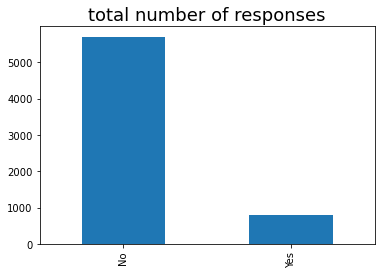

In [32]:
ca_df['response'].value_counts().plot(kind="bar")
plt.title("total number of responses",{"fontsize":18})

In [33]:
# response rate by the sales channel.
ca_df.sales_channel.value_counts()

Agent          2424
Branch         1844
Call Center    1275
Web             955
Name: sales_channel, dtype: int64

In [34]:
# response_rate= answers_recieved/total_answers
#In order to calculate the response rate, I will create a new column called "Yes_response"

response_labels ={
    "Yes":"1",
    "No":"0"
}


In [35]:
ca_df=ca_df.assign(yes_response=ca_df.response.map(response_labels))


In [36]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region,yes_response
0,arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,central,0
2,washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,east,0
3,oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize,north,1
6,california,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,west,0
7,california,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,west,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize,west,0
10903,arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize,central,0
10906,oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize,north,0
10907,arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize,central,0


In [37]:
#now we calculate the responsate with the following function:

response_rate = ca_df.groupby(['response','sales_channel'])['yes_response'].count().reset_index()


In [38]:
response_rate

,response,sales_channel,yes_response
0,No,Agent,2021
1,No,Branch,1660
2,No,Call Center,1167
3,No,Web,859
4,Yes,Agent,403
5,Yes,Branch,184
6,Yes,Call Center,108
7,Yes,Web,96


Text(0.5, 1.0, 'Response rate by channel')

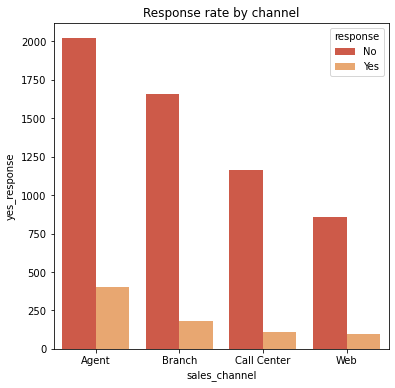

In [39]:
sns.set_palette("RdYlGn")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate["sales_channel"],y=response_rate["yes_response"],hue=response_rate["response"])
ax.set_title("Response rate by channel")



In [40]:
#Show a plot of the response rate by the total claim amount.
#I create buckets in the variable total_claim_amount
pd.cut(ca_df['total_claim_amount'],4)

0        (-2.893, 723.25]
2        (-2.893, 723.25]
3        (-2.893, 723.25]
6        (-2.893, 723.25]
7        (-2.893, 723.25]
               ...       
10902    (-2.893, 723.25]
10903    (-2.893, 723.25]
10906    (-2.893, 723.25]
10907    (-2.893, 723.25]
10908    (-2.893, 723.25]
Name: total_claim_amount, Length: 6498, dtype: category
Categories (4, interval[float64, right]): [(-2.893, 723.25] < (723.25, 1446.5] < (1446.5, 2169.75] < (2169.75, 2893.0]]

In [41]:
#I create the label for the new column total_claim_amount_binned
total_claim_amount_labels = ['Low', 'Moderate', 'High', 'Very High']
ca_df['total_claim_amount_binned'] = pd.cut(ca_df['total_claim_amount'],4, labels=total_claim_amount_labels)

In [42]:
response_rate_c=ca_df.groupby(['response',"total_claim_amount_binned"])['yes_response'].count().reset_index()
response_rate_c

,response,total_claim_amount_binned,yes_response
0,No,Low,5293
1,No,Moderate,395
2,No,High,15
3,No,Very High,4
4,Yes,Low,733
5,Yes,Moderate,58
6,Yes,High,0
7,Yes,Very High,0


Text(0.5, 1.0, 'Response rate by the total claim amount')

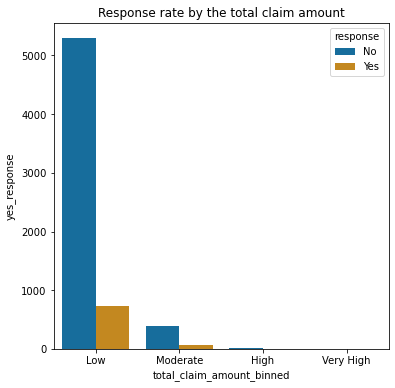

In [43]:
sns.set_palette("colorblind")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_c["total_claim_amount_binned"],y=response_rate_c["yes_response"],hue=response_rate_c["response"])
ax.set_title("Response rate by the total claim amount")


In [44]:
#Show a plot of the response rate by income.
#I create buckets for the column income
pd.cut(ca_df['income'],4)

0         (32523.0, 55009.0]
2        (9947.056, 32523.0]
3         (32523.0, 55009.0]
6         (32523.0, 55009.0]
7         (77495.0, 99981.0]
                ...         
10902    (9947.056, 32523.0]
10903     (55009.0, 77495.0]
10906     (55009.0, 77495.0]
10907     (32523.0, 55009.0]
10908     (55009.0, 77495.0]
Name: income, Length: 6498, dtype: category
Categories (4, interval[float64, right]): [(9947.056, 32523.0] < (32523.0, 55009.0] < (55009.0, 77495.0] < (77495.0, 99981.0]]

In [45]:
income_labels = ['Low', 'Lower_middel', 'Upper_middle', 'Hight']
ca_df['income_binned'] = pd.cut(ca_df['income'],4, labels=income_labels)

In [46]:
response_rate_i=ca_df.groupby(['response',"income_binned"])['yes_response'].count().reset_index()
response_rate_i

,response,income_binned,yes_response
0,No,Low,1666
1,No,Lower_middel,1583
2,No,Upper_middle,1424
3,No,Hight,1034
4,Yes,Low,321
5,Yes,Lower_middel,158
6,Yes,Upper_middle,209
7,Yes,Hight,103


Text(0.5, 1.0, 'Response rate by income')

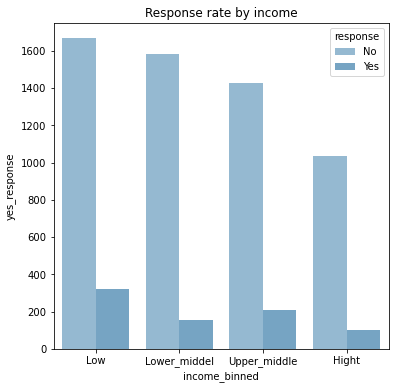

In [47]:
sns.set_palette("Blues_d")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_i["income_binned"],y=response_rate_i["yes_response"],hue=response_rate_i["response"])
ax.set_title("Response rate by income")

In [48]:
# We have to drop the columns created for plotting
ca_df.drop(["yes_response","total_claim_amount_binned","income_binned"],axis=1,inplace=True)

In [49]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region
0,arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,0.38184,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,central
2,washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,0.38184,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,east
3,oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,0.38184,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize,north
6,california,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,3.00000,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,west
7,california,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,0.38184,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,california,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,2.00000,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize,west
10903,arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,4.00000,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize,central
10906,oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,0.38184,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize,north
10907,arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,0.38184,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize,central


# Correlation analysis

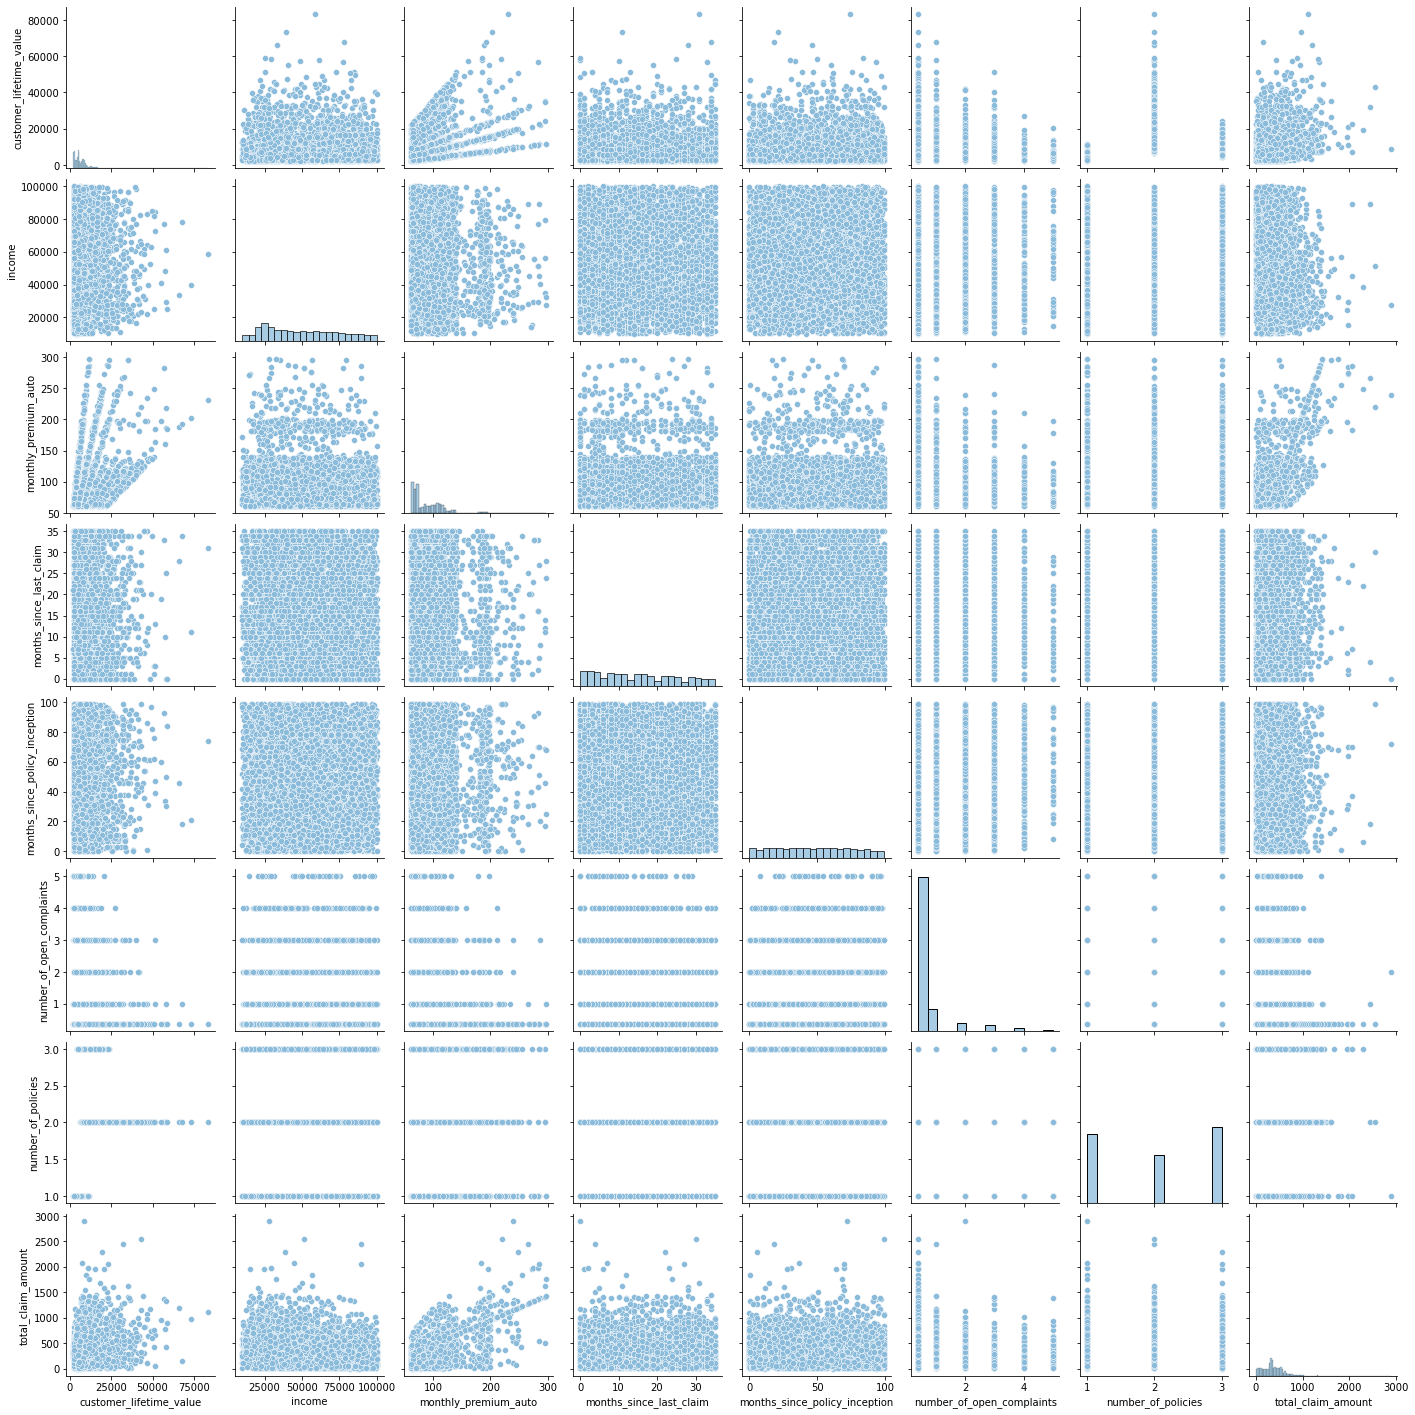

In [50]:
#I want to see the relation between the variables.
#We use the function pairplot from sns to do that

sns.pairplot(ca_df)

In [51]:
# Plot the Correlation Heatmap
#before, we can check the correlation

ca_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.004417,0.405543,0.015757,0.010319,-0.028753,0.201720,0.248816
income,0.004417,1.000000,-0.009714,-0.034757,0.014062,0.016586,0.010803,-0.214397
monthly_premium_auto,0.405543,-0.009714,1.000000,0.003545,0.020068,-0.008313,-0.033138,0.633936
months_since_last_claim,0.015757,-0.034757,0.003545,1.000000,-0.044672,-0.000534,0.015788,0.001179
months_since_policy_inception,0.010319,0.014062,0.020068,-0.044672,1.000000,0.004638,-0.004631,-0.005418
number_of_open_complaints,-0.028753,0.016586,-0.008313,-0.000534,0.004638,1.000000,0.006570,-0.009071
number_of_policies,0.201720,0.010803,-0.033138,0.015788,-0.004631,0.006570,1.000000,-0.027454
total_claim_amount,0.248816,-0.214397,0.633936,0.001179,-0.005418,-0.009071,-0.027454,1.000000


<AxesSubplot:>

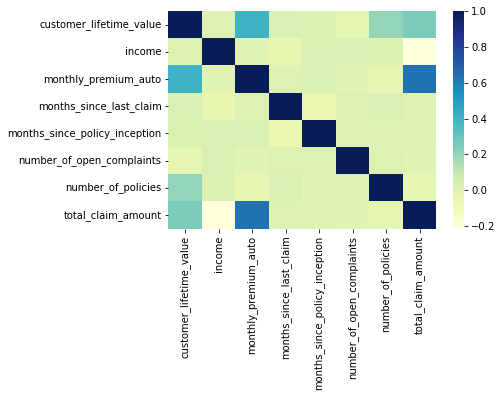

In [52]:
sns.heatmap(ca_df.corr(),cmap="YlGnBu")

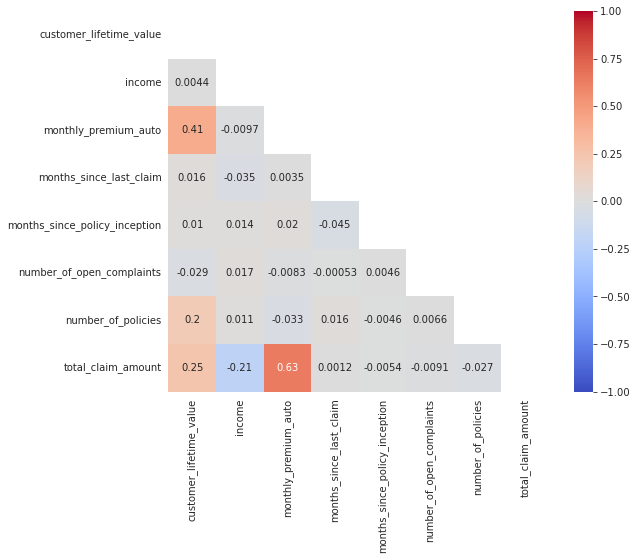

In [53]:
# we use the correlation matrix to check the multicollinearity

corr = ca_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

There are not high correlation between the variables, we do not drop any variable

In [54]:

ca_df.corr().to_csv("correllation.csv")

### Removing outliers from numerical variables
We will use box plot to identify them and remove them

In [55]:
# formula to get numeric variables from our data set
X=ca_df._get_numeric_data()

<AxesSubplot:>

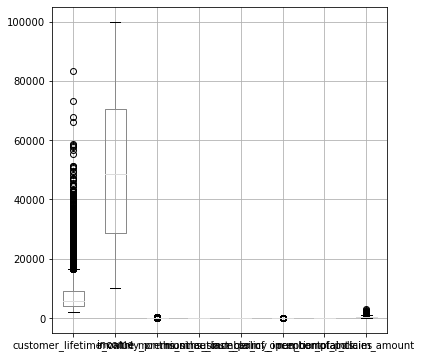

In [56]:
#In oder to check the outliers we need the boxplot of the numerical columns:
X.boxplot(figsize=(6,6))

In [57]:
# We can see the "customer_lifetime_value" has many outliers. 
# 1. We need to identify the percentile 25 and the percentile 75
# irq: interquartile range

percentile25 = X['customer_lifetime_value'].quantile(0.25)
percentile75 = X['customer_lifetime_value'].quantile(0.75)
iqr = percentile75 - percentile25

In [58]:
# 2 Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [59]:
# 3 Finding Outliers
X[X['customer_lifetime_value'] > upper_limit]

X[X['customer_lifetime_value'] < lower_limit]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount


In [60]:
# 4 Trimming
new_X = X[X['customer_lifetime_value'] < upper_limit]
new_X.shape

(5924, 8)

In [61]:
# 5 Capping

new_X_cap = X.copy()
new_X_cap['customer_lifetime_value'] = np.where(
    new_X_cap['customer_lifetime_value'] > upper_limit,
    upper_limit,
    np.where(
        new_X_cap['customer_lifetime_value'] < lower_limit,
        lower_limit,
        new_X_cap['customer_lifetime_value']
    )
)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


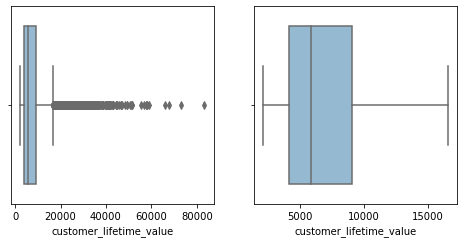

In [62]:
# 7 Compare the plots after capping 
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.boxplot(X['customer_lifetime_value'])

plt.subplot(2,2,2)
sns.boxplot(new_X_cap['customer_lifetime_value'])

plt.show()

 We also have to remove the outliers from **"montly_premium_ auto"**

In [63]:

# 1 We need to identify the percentile 25 and the percentile 75
# irq: interquartile range

percentile25 = X['monthly_premium_auto'].quantile(0.25)
percentile75 = X['monthly_premium_auto'].quantile(0.75)
iqr = percentile75 - percentile25

In [64]:
# 2 Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [65]:
# 3 Finding Outliers
X[X['monthly_premium_auto'] > upper_limit]

X[X['monthly_premium_auto'] < lower_limit]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount


In [66]:
# 4 Trimming
new_X = X[X['monthly_premium_auto'] < upper_limit]
new_X.shape

(6185, 8)

In [67]:
# 5 Capping

new_X_cap = X.copy()
new_X_cap['monthly_premium_auto'] = np.where(
    new_X_cap['monthly_premium_auto'] > upper_limit,
    upper_limit,
    np.where(
        new_X_cap['monthly_premium_auto'] < lower_limit,
        lower_limit,
        new_X_cap['monthly_premium_auto']
    )
)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


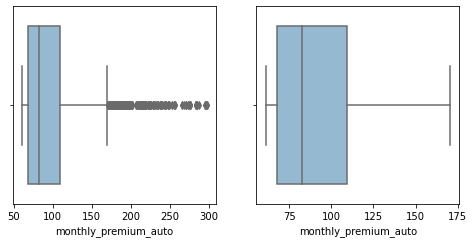

In [68]:
# 7 Compare the plots after capping 
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.boxplot(X['monthly_premium_auto'])

plt.subplot(2,2,2)
sns.boxplot(new_X_cap['monthly_premium_auto'])

plt.show()

 We also have to remove the outliers from **"total_claim_amount"**

In [69]:
# 1 We need to identify the percentile 25 and the percentile 75
# irq: interquartile range

percentile25 = X['total_claim_amount'].quantile(0.25)
percentile75 = X['total_claim_amount'].quantile(0.75)
iqr = percentile75 - percentile25

In [70]:
# 2 Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [71]:
# 3 Finding Outliers
X[X['total_claim_amount'] > upper_limit]

X[X['total_claim_amount'] < lower_limit]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount


In [72]:
# 4 Trimming
new_X = X[X['total_claim_amount'] < upper_limit]
new_X.shape

(6279, 8)

In [73]:
# 5 Capping

new_X_cap = X.copy()
new_X_cap['total_claim_amount'] = np.where(
    new_X_cap['total_claim_amount'] > upper_limit,
    upper_limit,
    np.where(
        new_X_cap['total_claim_amount'] < lower_limit,
        lower_limit,
        new_X_cap['total_claim_amount']
    )
)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


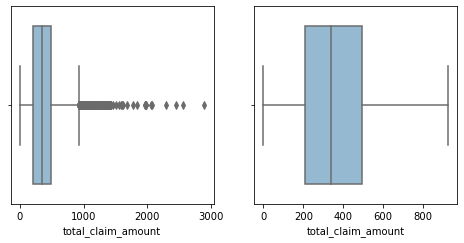

In [74]:
# 6 Compare the plots after capping 
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.boxplot(X['total_claim_amount'])

plt.subplot(2,2,2)
sns.boxplot(new_X_cap['total_claim_amount'])

plt.show()

now we filter the variables **"customer_lifetime_value","monthly_premium_amount" and "total_claim_amount"**
so we can remove the outliers

In [75]:
# filter values of the variable "montly_premium_auto"

ca_df=ca_df[ca_df["monthly_premium_auto"]<160]



In [76]:
# filter values of the variable "customer_lifetime_value"

ca_df=ca_df[ca_df["customer_lifetime_value"]<16000]

In [77]:
# filter values of the variable "total_claim_amount"

ca_df=ca_df[ca_df["total_claim_amount"]<900]

# Normality of the numerical variables

In [78]:
# We get the numerical variables from X

X=ca_df._get_numeric_data()


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

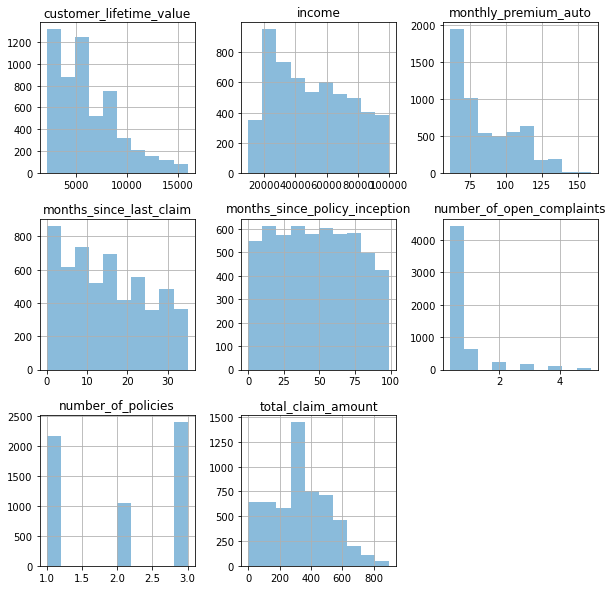

In [79]:
# We check the histograms of the numberical variables.
X.hist(figsize=(10,10))

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

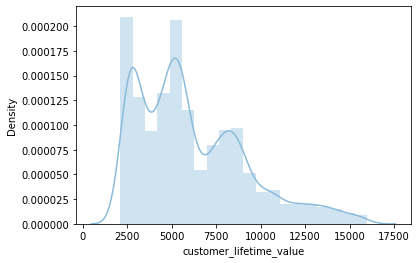

In [80]:
# We use Power Transformation to transform all variables into normal distribution

sns.distplot((ca_df['customer_lifetime_value']), bins=20)

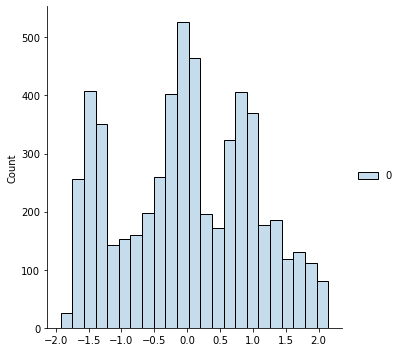

In [81]:
pt = PowerTransformer(method="box-cox")
med_customer_lifetime_value_trans=pt.fit_transform(ca_df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(med_customer_lifetime_value_trans)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

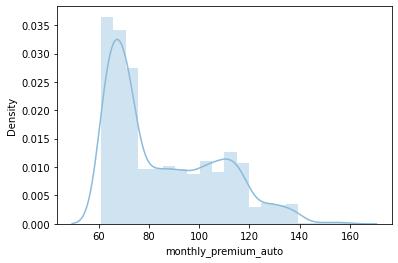

In [82]:
sns.distplot((ca_df['monthly_premium_auto']), bins=20)

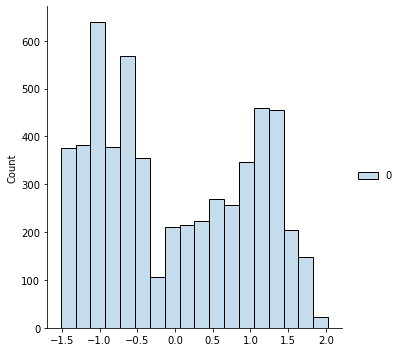

In [83]:
pt = PowerTransformer(method="box-cox")
med_monthly_premium_auto_trans=pt.fit_transform(ca_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(med_monthly_premium_auto_trans)

In [84]:
# We need to introduce the transform variables in the model

ca_df["med_customer_lifetime_value_trans"]= med_customer_lifetime_value_trans
ca_df["med_monthly_premium_auto_trans"]= med_monthly_premium_auto_trans


In [85]:
# We need to delete the old column

ca_df.drop(["customer_lifetime_value"],axis=1,inplace=True)
ca_df.drop(["monthly_premium_auto"],axis=1,inplace=True)


In [86]:
ca_df

,state,response,coverage,employmentstatus,gender,income,location_code,marital_status,months_since_last_claim,months_since_policy_inception,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region,med_customer_lifetime_value_trans,med_monthly_premium_auto_trans
0,arizona,No,Basic,Employed,M,48029,Suburban,Married,7.0,52,...,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,central,-0.246916,-1.514333
2,washington,No,Basic,Employed,M,22139,Suburban,Single,34.0,31,...,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,east,2.016568,0.863117
6,california,No,Basic,Employed,F,37405,Urban,Married,8.0,99,...,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,west,-0.153916,-1.306365
7,california,No,Basic,Employed,M,87197,Urban,Single,35.0,45,...,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,west,-0.185928,-1.306365
8,california,Yes,Premium,Employed,M,66839,Suburban,Single,33.0,24,...,Personal Auto,Personal,Offer2,Branch,739.0,Sports Car,Medsize,west,0.196761,1.971281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,washington,No,Premium,Employed,M,33531,Suburban,Married,11.0,15,...,Personal Auto,Personal,Offer4,Agent,802.0,Two-Door Car,Medsize,east,-0.360071,1.318460
10902,california,No,Extended,Employed,F,28304,Suburban,Married,10.0,30,...,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize,west,-0.847872,0.522725
10903,arizona,No,Basic,Employed,M,59855,Suburban,Married,30.0,82,...,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize,central,-1.371522,-0.393808
10906,oregon,No,Basic,Employed,F,61146,Urban,Married,7.0,68,...,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize,north,-0.065876,-1.113336


### Predictive Modeling

### XY split

In [87]:
# "total_claim_amount" is our dependent variable. 
# We have to separate our target variable from the others

X=ca_df.drop('total_claim_amount', axis=1)

Y=ca_df.total_claim_amount

In [88]:
X =X._get_numeric_data()


In [89]:
X

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,med_customer_lifetime_value_trans,med_monthly_premium_auto_trans
0,48029,7.0,52,0.38184,3,-0.246916,-1.514333
2,22139,34.0,31,0.38184,2,2.016568,0.863117
6,37405,8.0,99,3.00000,3,-0.153916,-1.306365
7,87197,35.0,45,0.38184,3,-0.185928,-1.306365
8,66839,33.0,24,0.38184,1,0.196761,1.971281
...,...,...,...,...,...,...,...
10901,33531,11.0,15,0.38184,1,-0.360071,1.318460
10902,28304,10.0,30,2.00000,1,-0.847872,0.522725
10903,59855,30.0,82,4.00000,1,-1.371522,-0.393808
10906,61146,7.0,68,0.38184,3,-0.065876,-1.113336


### Normalize

In [90]:
#normalize numeric features / rescaling using Normalizer

X_scaled=StandardScaler().fit_transform(X)


In [91]:
X_scaled.shape

(5614, 7)

In [92]:
#variables from X data set are now normalized. 
X_scaled

array([[-0.12163836, -0.79282407,  0.15268515, ...,  1.06350463,
        -0.24691562, -1.51433253],
       [-1.18391926,  1.89841718, -0.59853191, ..., -0.04563804,
         2.01656843,  0.86311686],
       [-0.55754691, -0.69314847,  1.83398049, ...,  1.06350463,
        -0.15391582, -1.30636549],
       ...,
       [ 0.3635889 ,  1.49971477,  1.22585239, ..., -1.15478071,
        -1.37152209, -0.39380777],
       [ 0.41655934, -0.79282407,  0.72504101, ...,  1.06350463,
        -0.06587555, -1.11333633],
       [ 0.54166148, -1.49055328, -0.74162088, ...,  1.06350463,
         1.57886542,  2.01896953]])

In [93]:
# we get our train and test data set
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.20, random_state=1000)

## Hot coding Categorical Variables 

In [94]:
categorical_df=ca_df.select_dtypes('object')

In [95]:
categorical_df

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region
0,arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize,central
2,washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize,east
6,california,No,Basic,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize,west
7,california,No,Basic,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize,west
8,california,Yes,Premium,Employed,M,Suburban,Single,Personal Auto,Personal,Offer2,Branch,Sports Car,Medsize,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,washington,No,Premium,Employed,M,Suburban,Married,Personal Auto,Personal,Offer4,Agent,Two-Door Car,Medsize,east
10902,california,No,Extended,Employed,F,Suburban,Married,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize,west
10903,arizona,No,Basic,Employed,M,Suburban,Married,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize,central
10906,oregon,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize,north


In [96]:
# get dummies pandas
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

categorical_df=pd.get_dummies(categorical_df, drop_first=True)

In [97]:
categorical_df

,state_california,state_nevada,state_oregon,state_washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,region_east,region_north,region_west
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
6,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
7,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
8,1,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,0
10902,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
10903,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
10906,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


### apply linear regresion

modeling using statsmodels

In [98]:
# We need to concat the numberical (X) and the catogorical variables:

X=pd.concat([X, categorical_df], axis=1) # concat numerical and categorical transformations


Without Scaling

In [99]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=1000)

In [100]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     567.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:32:50   Log-Likelihood:                -26052.
No. Observations:                4491   AIC:                         5.217e+04
Df Residuals:                    4456   BIC:                         5.240e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Scaled

In [101]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [102]:
X_train_scaled_constant= sm.add_constant(X_train_scaled)
X_test_scaled_constant= sm.add_constant(X_test_scaled)  #adding a constant
model=sm.OLS(y_train,X_train_scaled_constant).fit()
predictions=model.predict(X_test_scaled_constant)

print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     567.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:32:50   Log-Likelihood:                -26052.
No. Observations:                4491   AIC:                         5.217e+04
Df Residuals:                    4456   BIC:                         5.240e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.7974      1.198    279.348      0.0

In [103]:
model.params.iloc[1:]

x1      -3.936211
x2       0.017080
x3      -2.666173
x4      -0.624238
x5      -6.106645
x6       6.932575
x7      78.729620
x8       0.155066
x9      -0.611508
x10      0.230917
x11      1.387352
x12     -1.316392
x13     -6.775200
x14     -0.639325
x15      0.066748
x16      1.714322
x17      2.578046
x18     -0.223049
x19    172.257502
x20     86.141804
x21     -0.113874
x22      2.125637
x23      0.528154
x24      0.519191
x25      0.528154
x26      0.519191
x27      2.738097
x28      0.641540
x29     -0.067628
x30      1.074765
x31      0.320404
x32      1.322651
x33     -0.895015
x34     -0.192330
x35      3.548003
x36      4.255917
x37      1.387352
x38      0.230917
x39      0.155066
dtype: float64

In [104]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.params.iloc[1:]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [105]:
features_importances 

,Attribute,Importance
x19,location_code_Suburban,172.257502
x20,location_code_Urban,86.141804
x7,med_monthly_premium_auto_trans,78.729620
x6,med_customer_lifetime_value_trans,6.932575
x36,vehicle_size_Small,4.255917
x35,vehicle_size_Medsize,3.548003
x27,renew_offer_type_Offer2,2.738097
x17,employmentstatus_Retired,2.578046
x22,marital_status_Single,2.125637
x16,employmentstatus_Medical Leave,1.714322


In [ ]:
# There are many irrelevant variables in my model that we can delete

X=X.drop("state_oregon","response_Yes","policy_Personal", axis=1)

In [ ]:
X
    